In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a common id for the teams in both databases

## Create helper table data:

In [4]:
team_name_pairings = [

    ('ac milan',
    'AC Milan'),

    ('arsenal',
    'Arsenal'),

    ('as monaco',
    'AS Monaco'),

    ('as roma',
    'AS Roma'),

    ('aston villa',
    'Aston Villa'),

    ('atletico madrid',
    'Atletico Madrid'),

    ('bologna fc',
    'Bologna FC'),

    ('everton fc',
    'Everton FC'),

    ('fc barcelona',
    'FC Barcelona'),

    ('fc porto',
    'FC Porto'),

    ('inter milan',
    'Inter Milan'),

    ('juventus',
    'Juventus'),

    ('lazio',
    'S.S. Lazio'),

    ('leeds united',
    'Leeds United'),

    ('manchester city',
    'Manchester City'),

    ('napoli',
    'Napoli'),

    ('paris saint germain',
    'Paris Saint-Germain'),

    ('real sociedad',
    'Real Sociedad'),

    ('sevilla fc',
    'Sevilla FC'),

    ('udinese',
    'Udinese Calcio'),

    ('valencia',
    'Valencia CF')
]

In [5]:
helper_table_data = [(t[0],t[1],i+1) for i,t in enumerate(team_name_pairings)]
helper_table_data

[('ac milan', 'AC Milan', 1),
 ('arsenal', 'Arsenal', 2),
 ('as monaco', 'AS Monaco', 3),
 ('as roma', 'AS Roma', 4),
 ('aston villa', 'Aston Villa', 5),
 ('atletico madrid', 'Atletico Madrid', 6),
 ('bologna fc', 'Bologna FC', 7),
 ('everton fc', 'Everton FC', 8),
 ('fc barcelona', 'FC Barcelona', 9),
 ('fc porto', 'FC Porto', 10),
 ('inter milan', 'Inter Milan', 11),
 ('juventus', 'Juventus', 12),
 ('lazio', 'S.S. Lazio', 13),
 ('leeds united', 'Leeds United', 14),
 ('manchester city', 'Manchester City', 15),
 ('napoli', 'Napoli', 16),
 ('paris saint germain', 'Paris Saint-Germain', 17),
 ('real sociedad', 'Real Sociedad', 18),
 ('sevilla fc', 'Sevilla FC', 19),
 ('udinese', 'Udinese Calcio', 20),
 ('valencia', 'Valencia CF', 21)]

In [6]:
from snowflake import connector

#setting credentials
import os
os.environ["SNOWSQL_USR"] = 'pp_guillermo' #insert username
os.environ["SNOWSQL_PWD"] = 'LionelMessi10' #insert password
os.environ["SNOWSQL_ACC"] = 'sx14805.west-europe.azure'
os.environ["SNOWSQL_WH"] = 'COMPUTE_WH'
os.environ["SNOWSQL_DB"] = 'PYTHON_PROJECT'
os.environ["SNOWSQL_SCH"] = 'PUBLIC'

# Connect to Snowflake
conn = connector.connect(
    user=os.getenv('SNOWSQL_USR'),
    password=os.getenv('SNOWSQL_PWD'),
    account=os.getenv('SNOWSQL_ACC'),
    warehouse=os.getenv('SNOWSQL_WH'),
    database=os.getenv('SNOWSQL_DB'),
    schema=os.getenv('SNOWSQL_SCH')
)

In [7]:
# Create a cursor object
cur = conn.cursor()

# Define all the setting queries
queries = [
        'USE ROLE PYTHON_PROJECT;',
        'USE DATABASE PYTHON_PROJECT;',
        'USE SCHEMA PYTHON_PROJECT.PUBLIC;',
        'USE WAREHOUSE COMPUTE_WH;'
        ]

# Adopt all correct settings
results=[]
for query in queries:
    cur.execute(query)
    result = cur.fetchall()
    results.append(result)

# Print the results
for row in results:
        print(row)

[('Statement executed successfully.',)]
[('Statement executed successfully.',)]
[('Statement executed successfully.',)]
[('Statement executed successfully.',)]


In [8]:
query = '''SELECT * FROM helper_table'''
cur.execute(query)
results = cur.fetchall()
results

[('ac milan', 'AC Milan', 1),
 ('arsenal', 'Arsenal', 2),
 ('as monaco', 'AS Monaco', 3),
 ('as roma', 'AS Roma', 4),
 ('aston villa', 'Aston Villa', 5),
 ('atletico madrid', 'Atletico Madrid', 6),
 ('bologna fc', 'Bologna FC', 7),
 ('everton fc', 'Everton FC', 8),
 ('fc barcelona', 'FC Barcelona', 9),
 ('fc porto', 'FC Porto', 10),
 ('inter milan', 'Inter Milan', 11),
 ('juventus', 'Juventus', 12),
 ('lazio', 'S.S. Lazio', 13),
 ('leeds united', 'Leeds United', 14),
 ('manchester city', 'Manchester City', 15),
 ('napoli', 'Napoli', 16),
 ('paris saint germain', 'Paris Saint-Germain', 17),
 ('real sociedad', 'Real Sociedad', 18),
 ('sevilla fc', 'Sevilla FC', 19),
 ('udinese', 'Udinese Calcio', 20),
 ('valencia', 'Valencia CF', 21)]

In [9]:
helper_df = pd.DataFrame(results, columns=['team_name_tokes', 'team_name_matches', 'common_id'])
helper_df

,team_name_tokes,team_name_matches,common_id
0,ac milan,AC Milan,1
1,arsenal,Arsenal,2
2,as monaco,AS Monaco,3
3,as roma,AS Roma,4
4,aston villa,Aston Villa,5
5,atletico madrid,Atletico Madrid,6
6,bologna fc,Bologna FC,7
7,everton fc,Everton FC,8
8,fc barcelona,FC Barcelona,9
9,fc porto,FC Porto,10


In [10]:
query = '''SELECT * FROM team_hist'''
cur.execute(query)
results = cur.fetchall()
results[:5]

[('AC Milan', datetime.datetime(2020, 6, 22, 17, 30), 98, 'W', 'MIL'),
 ('AC Milan', datetime.datetime(2020, 6, 28, 15, 15), 98, 'W', 'MIL'),
 ('AC Milan', datetime.datetime(2020, 7, 1, 19, 45), 98, 'D', 'MIL'),
 ('AC Milan', datetime.datetime(2020, 7, 4, 19, 45), 98, 'W', 'MIL'),
 ('AC Milan', datetime.datetime(2020, 7, 7, 19, 45), 98, 'W', 'MIL')]

In [11]:
team_hist_df = pd.DataFrame(results, columns=['team_name', 'match_date', 'team_local_id', 'result', 'team_code'])
team_hist_df

,team_name,match_date,team_local_id,result,team_code
0,AC Milan,2020-06-22 17:30:00,98,W,MIL
1,AC Milan,2020-06-28 15:15:00,98,W,MIL
2,AC Milan,2020-07-01 19:45:00,98,D,MIL
3,AC Milan,2020-07-04 19:45:00,98,W,MIL
4,AC Milan,2020-07-07 19:45:00,98,W,MIL
...,...,...,...,...,...
3021,Valencia CF,2023-09-02 16:30:00,95,L,VAL
3022,Valencia CF,2023-09-16 14:15:00,95,W,VAL
3023,Valencia CF,2023-09-23 19:00:00,95,D,VAL
3024,Valencia CF,2023-09-27 19:30:00,95,L,VAL


In [12]:
query = '''SELECT * FROM fan_tokens'''
cur.execute(query)
results = cur.fetchall()
results[:5]

[(1,
  'fc barcelona',
  'fc barcelona fan token',
  'fc-barcelona-fan-token',
  datetime.date(2020, 6, 25),
  Decimal('311876.95'),
  Decimal('6.26')),
 (2,
  'fc barcelona',
  'fc barcelona fan token',
  'fc-barcelona-fan-token',
  datetime.date(2020, 6, 26),
  Decimal('311876.95'),
  Decimal('6.26')),
 (3,
  'fc barcelona',
  'fc barcelona fan token',
  'fc-barcelona-fan-token',
  datetime.date(2020, 6, 27),
  Decimal('300380.94'),
  Decimal('5.80')),
 (4,
  'fc barcelona',
  'fc barcelona fan token',
  'fc-barcelona-fan-token',
  datetime.date(2020, 6, 28),
  Decimal('318666.02'),
  Decimal('4.97')),
 (5,
  'fc barcelona',
  'fc barcelona fan token',
  'fc-barcelona-fan-token',
  datetime.date(2020, 6, 29),
  Decimal('331790.30'),
  Decimal('5.05'))]

In [13]:
fan_tokens_df = pd.DataFrame(results, columns=['id', 'team_name', 'token_name', 'slug', 'date', 'volume', 'price'])
fan_tokens_df

,id,team_name,token_name,slug,date,volume,price
0,1,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-25,311876.95,6.26
1,2,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-26,311876.95,6.26
2,3,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-27,300380.94,5.80
3,4,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-28,318666.02,4.97
4,5,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-29,331790.30,5.05
...,...,...,...,...,...,...,...
21796,34469,udinese,udinese fan token,udinese-fan-token,2023-10-01,60013.87,0.97
21797,34470,udinese,udinese fan token,udinese-fan-token,2023-10-02,56180.40,0.99
21798,34471,udinese,udinese fan token,udinese-fan-token,2023-10-03,52872.13,0.95
21799,34472,udinese,udinese fan token,udinese-fan-token,2023-10-04,49497.94,0.90


In [14]:
team_hist_df = team_hist_df.rename(columns={'team_name':'team_name_matches'}).merge(helper_df, on='team_name_matches')
team_hist_df

,team_name_matches,match_date,team_local_id,result,team_code,team_name_tokes,common_id
0,AC Milan,2020-06-22 17:30:00,98,W,MIL,ac milan,1
1,AC Milan,2020-06-28 15:15:00,98,W,MIL,ac milan,1
2,AC Milan,2020-07-01 19:45:00,98,D,MIL,ac milan,1
3,AC Milan,2020-07-04 19:45:00,98,W,MIL,ac milan,1
4,AC Milan,2020-07-07 19:45:00,98,W,MIL,ac milan,1
...,...,...,...,...,...,...,...
2738,Valencia CF,2023-09-02 16:30:00,95,L,VAL,valencia,21
2739,Valencia CF,2023-09-16 14:15:00,95,W,VAL,valencia,21
2740,Valencia CF,2023-09-23 19:00:00,95,D,VAL,valencia,21
2741,Valencia CF,2023-09-27 19:30:00,95,L,VAL,valencia,21


In [15]:
fan_tokens_df = fan_tokens_df.rename(columns={'team_name':'team_name_tokes'}).merge(helper_df)
fan_tokens_df

,id,team_name_tokes,token_name,slug,date,volume,price,team_name_matches,common_id
0,1,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-25,311876.95,6.26,FC Barcelona,9
1,2,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-26,311876.95,6.26,FC Barcelona,9
2,3,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-27,300380.94,5.80,FC Barcelona,9
3,4,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-28,318666.02,4.97,FC Barcelona,9
4,5,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-29,331790.30,5.05,FC Barcelona,9
...,...,...,...,...,...,...,...,...,...
16188,34469,udinese,udinese fan token,udinese-fan-token,2023-10-01,60013.87,0.97,Udinese Calcio,20
16189,34470,udinese,udinese fan token,udinese-fan-token,2023-10-02,56180.40,0.99,Udinese Calcio,20
16190,34471,udinese,udinese fan token,udinese-fan-token,2023-10-03,52872.13,0.95,Udinese Calcio,20
16191,34472,udinese,udinese fan token,udinese-fan-token,2023-10-04,49497.94,0.90,Udinese Calcio,20


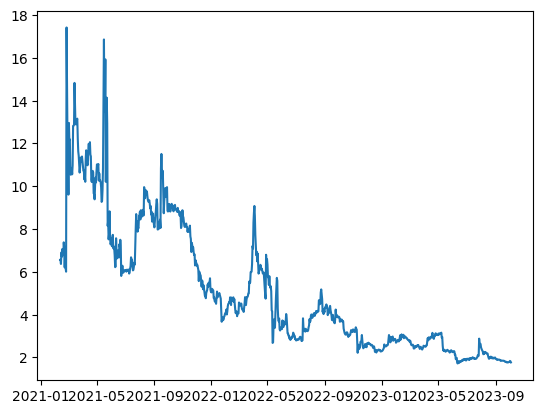

In [16]:
milan_fan_tokens = fan_tokens_df[fan_tokens_df['common_id'] == 1]

plt.plot(milan_fan_tokens['date'], milan_fan_tokens['price'])


In [17]:
fan_tokens_df['date']=pd.to_datetime(fan_tokens_df['date']).dt.date
fan_tokens_df['date']

0        2020-06-25
1        2020-06-26
2        2020-06-27
3        2020-06-28
4        2020-06-29
            ...    
16188    2023-10-01
16189    2023-10-02
16190    2023-10-03
16191    2023-10-04
16192    2023-10-04
Name: date, Length: 16193, dtype: object

In [18]:
team_hist_df['time'] = team_hist_df['match_date'].dt.time
team_hist_df['date'] = team_hist_df['match_date'].dt.date
team_hist_df

,team_name_matches,match_date,team_local_id,result,team_code,team_name_tokes,common_id,time,date
0,AC Milan,2020-06-22 17:30:00,98,W,MIL,ac milan,1,17:30:00,2020-06-22
1,AC Milan,2020-06-28 15:15:00,98,W,MIL,ac milan,1,15:15:00,2020-06-28
2,AC Milan,2020-07-01 19:45:00,98,D,MIL,ac milan,1,19:45:00,2020-07-01
3,AC Milan,2020-07-04 19:45:00,98,W,MIL,ac milan,1,19:45:00,2020-07-04
4,AC Milan,2020-07-07 19:45:00,98,W,MIL,ac milan,1,19:45:00,2020-07-07
...,...,...,...,...,...,...,...,...,...
2738,Valencia CF,2023-09-02 16:30:00,95,L,VAL,valencia,21,16:30:00,2023-09-02
2739,Valencia CF,2023-09-16 14:15:00,95,W,VAL,valencia,21,14:15:00,2023-09-16
2740,Valencia CF,2023-09-23 19:00:00,95,D,VAL,valencia,21,19:00:00,2023-09-23
2741,Valencia CF,2023-09-27 19:30:00,95,L,VAL,valencia,21,19:30:00,2023-09-27


In [19]:
milan_matches = team_hist_df[team_hist_df['common_id'] == 1]
milan_df = milan_matches.merge(milan_fan_tokens, on='date')
milan_df

,team_name_matches_x,match_date,team_local_id,result,team_code,team_name_tokes_x,common_id_x,time,date,id,team_name_tokes_y,token_name,slug,volume,price,team_name_matches_y,common_id_y
0,AC Milan,2021-02-13 19:45:00,98,L,MIL,ac milan,1,19:45:00,2021-02-13,8365,ac milan,ac milan fan token,ac-milan-fan-token,478681.31,6.37,AC Milan,1
1,AC Milan,2021-02-21 14:00:00,98,L,MIL,ac milan,1,14:00:00,2021-02-21,8373,ac milan,ac milan fan token,ac-milan-fan-token,324003.18,6.21,AC Milan,1
2,AC Milan,2021-02-28 19:45:00,98,W,MIL,ac milan,1,19:45:00,2021-02-28,8380,ac milan,ac milan fan token,ac-milan-fan-token,8723937.22,11.60,AC Milan,1
3,AC Milan,2021-03-03 19:45:00,98,D,MIL,ac milan,1,19:45:00,2021-03-03,8383,ac milan,ac milan fan token,ac-milan-fan-token,15556596.42,12.14,AC Milan,1
4,AC Milan,2021-03-07 14:00:00,98,W,MIL,ac milan,1,14:00:00,2021-03-07,8387,ac milan,ac milan fan token,ac-milan-fan-token,6767685.08,10.72,AC Milan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,AC Milan,2023-09-23 13:00:00,98,W,MIL,ac milan,1,13:00:00,2023-09-23,9317,ac milan,ac milan fan token,ac-milan-fan-token,463926.52,1.79,AC Milan,1
117,AC Milan,2023-09-27 16:30:00,98,W,MIL,ac milan,1,16:30:00,2023-09-27,9321,ac milan,ac milan fan token,ac-milan-fan-token,587740.10,1.77,AC Milan,1
118,AC Milan,2023-09-30 16:00:00,98,W,MIL,ac milan,1,16:00:00,2023-09-30,9324,ac milan,ac milan fan token,ac-milan-fan-token,564705.54,1.79,AC Milan,1
119,AC Milan,2023-10-04 19:00:00,98,D,MIL,ac milan,1,19:00:00,2023-10-04,9328,ac milan,ac milan fan token,ac-milan-fan-token,827107.20,1.77,AC Milan,1


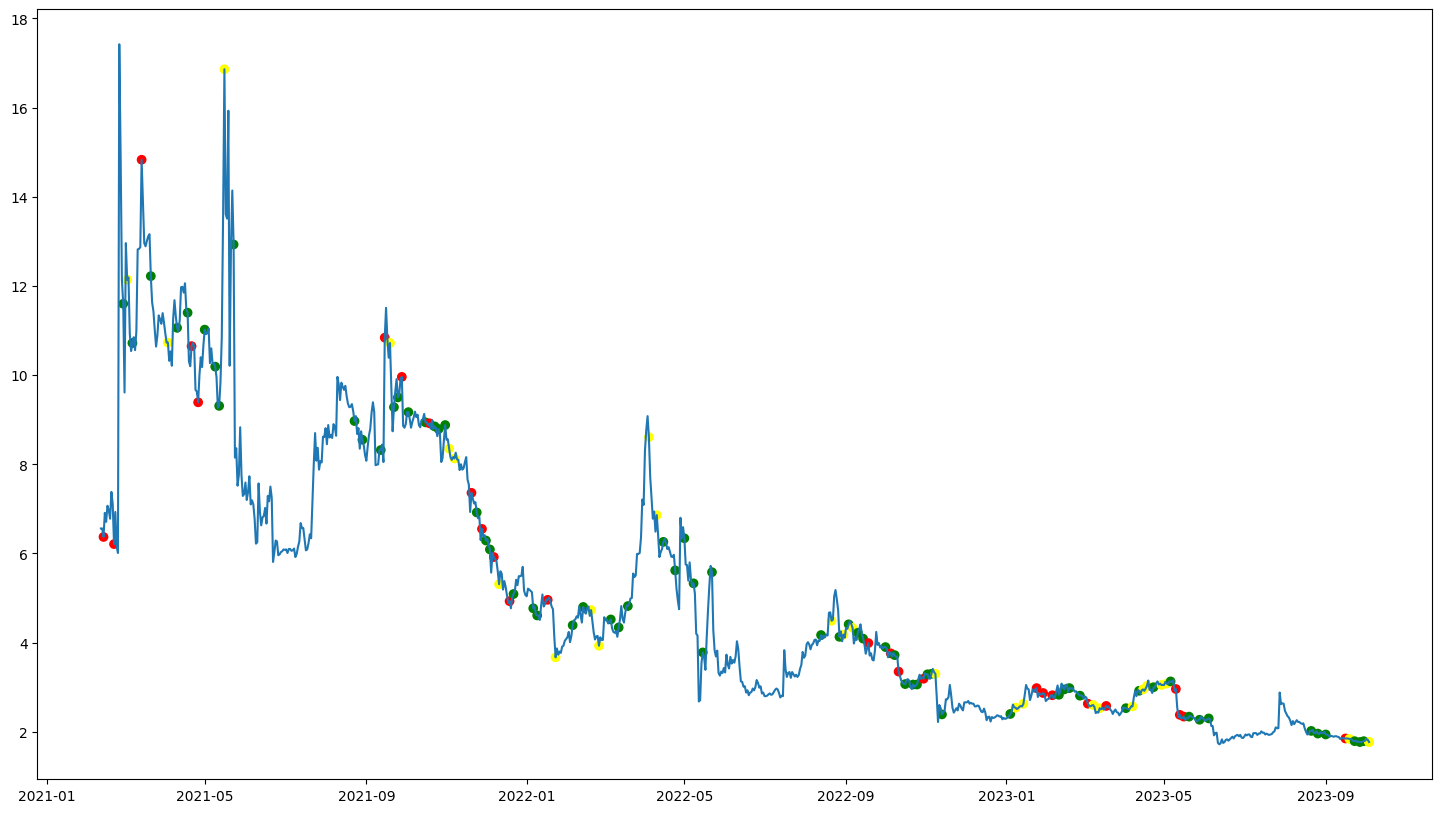

In [20]:
plt.figure(figsize=(18, 10))

color_mapping = {
    'W': 'green',
    'D': 'yellow',
    'L': 'red'
}

plt.plot(milan_fan_tokens['date'], milan_fan_tokens['price'])
plt.scatter(milan_df['date'], milan_df['price'], color=milan_df['result'].apply(lambda x: color_mapping[x]), label=milan_df['result'])

# Add date 

plt.show()

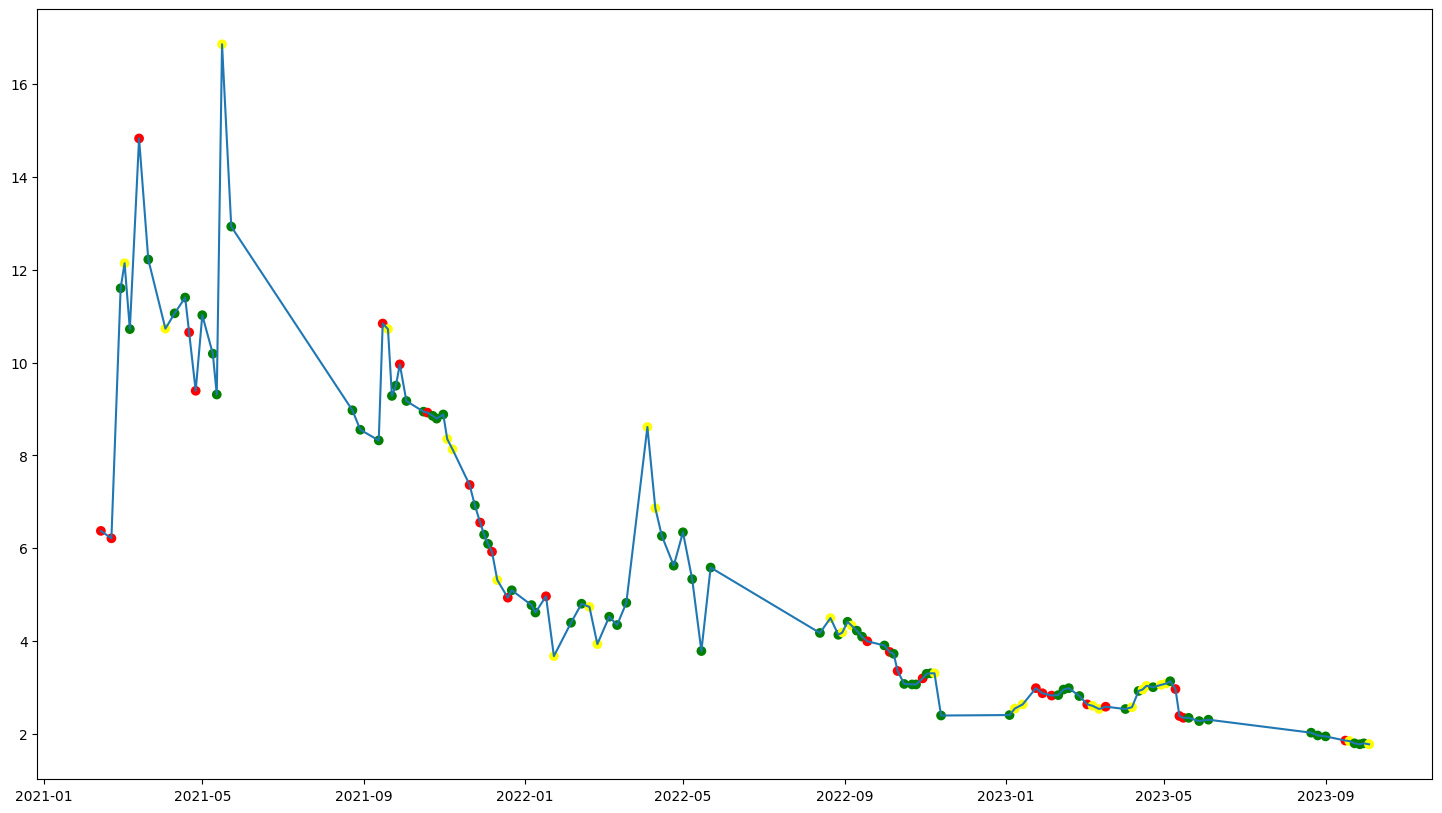

In [21]:
plt.figure(figsize=(18, 10))

color_mapping = {
    'W': 'green',
    'D': 'yellow',
    'L': 'red'
}

plt.plot(milan_df['date'], milan_df['price'])
plt.scatter(milan_df['date'], milan_df['price'], color=milan_df['result'].apply(lambda x: color_mapping[x]), label=milan_df['result'])

plt.show()

In [22]:
# Example of .diff()
data = {'Column1': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

df['Difference'] = df['Column1'].diff()

print(df)

   Column1  Difference
0       10         NaN
1       20        10.0
2       30        10.0
3       40        10.0
4       50        10.0


In [23]:
milan_df['price'].diff()

0        NaN
1      -0.16
2       5.39
3       0.54
4      -1.42
       ...  
116    -0.05
117    -0.02
118     0.02
119    -0.02
120     0.00
Name: price, Length: 121, dtype: object

In [38]:
milan_df

,team_name_matches_x,match_date,team_local_id,result,team_code,team_name_tokes_x,common_id_x,time,date,id,team_name_tokes_y,token_name,slug,volume,price,team_name_matches_y,common_id_y,price_delta
0,AC Milan,2021-02-13 19:45:00,98,L,MIL,ac milan,1,19:45:00,2021-02-13,8365,ac milan,ac milan fan token,ac-milan-fan-token,478681.31,6.37,AC Milan,1,NaN
1,AC Milan,2021-02-21 14:00:00,98,L,MIL,ac milan,1,14:00:00,2021-02-21,8373,ac milan,ac milan fan token,ac-milan-fan-token,324003.18,6.21,AC Milan,1,-0.16
2,AC Milan,2021-02-28 19:45:00,98,W,MIL,ac milan,1,19:45:00,2021-02-28,8380,ac milan,ac milan fan token,ac-milan-fan-token,8723937.22,11.60,AC Milan,1,5.39
3,AC Milan,2021-03-03 19:45:00,98,D,MIL,ac milan,1,19:45:00,2021-03-03,8383,ac milan,ac milan fan token,ac-milan-fan-token,15556596.42,12.14,AC Milan,1,0.54
4,AC Milan,2021-03-07 14:00:00,98,W,MIL,ac milan,1,14:00:00,2021-03-07,8387,ac milan,ac milan fan token,ac-milan-fan-token,6767685.08,10.72,AC Milan,1,-1.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,AC Milan,2023-09-23 13:00:00,98,W,MIL,ac milan,1,13:00:00,2023-09-23,9317,ac milan,ac milan fan token,ac-milan-fan-token,463926.52,1.79,AC Milan,1,-0.05
117,AC Milan,2023-09-27 16:30:00,98,W,MIL,ac milan,1,16:30:00,2023-09-27,9321,ac milan,ac milan fan token,ac-milan-fan-token,587740.10,1.77,AC Milan,1,-0.02
118,AC Milan,2023-09-30 16:00:00,98,W,MIL,ac milan,1,16:00:00,2023-09-30,9324,ac milan,ac milan fan token,ac-milan-fan-token,564705.54,1.79,AC Milan,1,0.02
119,AC Milan,2023-10-04 19:00:00,98,D,MIL,ac milan,1,19:00:00,2023-10-04,9328,ac milan,ac milan fan token,ac-milan-fan-token,827107.20,1.77,AC Milan,1,-0.02


In [49]:
milan_df['price_delta'] = milan_df['price'].diff()
milan_df.groupby('result').agg({'price_delta':'sum'})

,price_delta
result,
D,5.62
L,2.26
W,-12.48


In [51]:
price_delta_df = pd.DataFrame()

for id in team_hist_df['common_id'].unique():
    team_stats_df = team_hist_df[team_hist_df['common_id'] == id]
    team_tokens_df = fan_tokens_df[fan_tokens_df['common_id'] == id]
    team_df = team_stats_df.merge(team_tokens_df, on='date')
    team_name = team_df.loc[0, 'team_name_matches_x']
    team_df['price_delta'] = team_df['price'].diff()
    team_delta_df = team_df.groupby('result').agg({'price_delta':'sum'}).rename(columns={'price_delta':f'{team_name}'})
    price_delta_df = pd.concat([price_delta_df, team_delta_df], axis=1)

price_delta_df = price_delta_df.transpose().reset_index().rename(columns={'index':'team_name'})

price_delta_df.columns.rename('index', inplace=True)

price_delta_df

index,team_name,D,L,W
0,AC Milan,5.62,2.26,-12.48
1,AS Roma,-9.81,1.01,6.72
2,Arsenal,-1.02,-1.81,-1.02
3,Aston Villa,-0.21,0.13,-2.59
4,Atletico Madrid,-1.99,-2.36,1.82
5,Bologna FC,-0.28,-0.50,0.34
6,Everton FC,-0.44,-0.49,-1.86
7,FC Barcelona,9.43,19.10,-32.14
8,FC Porto,-1.31,-4.03,1.50
9,Inter Milan,3.11,-1.89,-8.05


<BarContainer object of 3 artists>

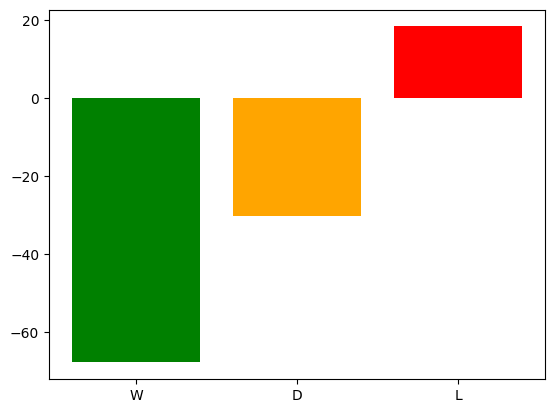

In [58]:
plt.bar(
    x=['W', 'D', 'L'],
    height=[
        price_delta_df.loc[:, 'W'].sum(),
        price_delta_df.loc[:, 'D'].sum(),
        price_delta_df.loc[:, 'L'].sum(),
    ],
    color=['green', 'orange', 'red']
)